Best k by MSE: 12 with MSE: 0.0007177278747699083
Best k by R²: 12 with R²: 0.29282874116930846


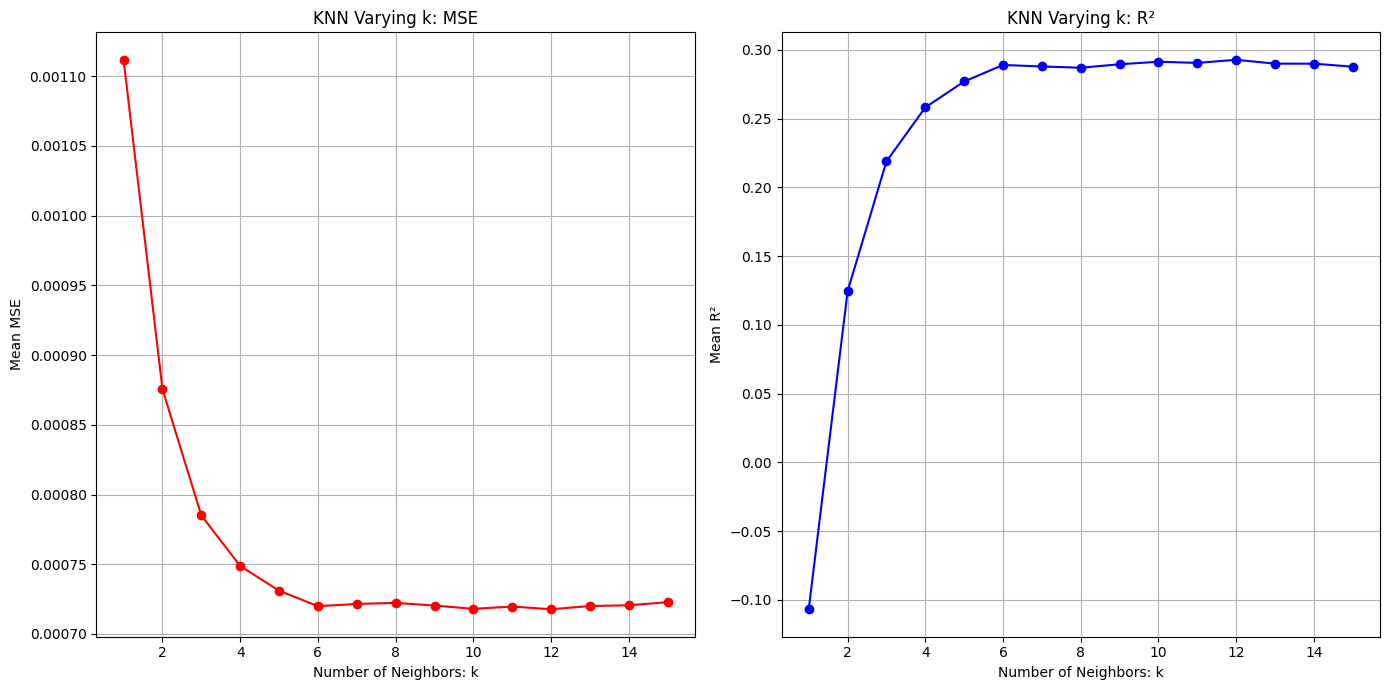

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import matplotlib.pyplot as plt

data = pd.read_csv('/Users/elili/Downloads/qtm 347 final /df_final.csv')

# Prepare  features and target variable
X = data.drop('CDR3', axis=1)
y = data['CDR3']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Prepare cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Testing different values of k
k_values = range(1, 16)
mse_scores = []
r2_scores = []

for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    # Cross-validate for MSE
    mse_cv_scores = cross_val_score(knn_model, X_scaled, y, cv=kf, scoring=make_scorer(mean_squared_error))
    mean_mse = np.mean(mse_cv_scores)
    mse_scores.append(mean_mse)
    
    # Cross-validate for R²
    r2_cv_scores = cross_val_score(knn_model, X_scaled, y, cv=kf, scoring='r2')
    mean_r2 = np.mean(r2_cv_scores)
    r2_scores.append(mean_r2)

# Identify the best k and corresponding scores
best_k_mse_index = np.argmin(mse_scores)
best_k_mse = k_values[best_k_mse_index]
best_mse = mse_scores[best_k_mse_index]

best_k_r2_index = np.argmax(r2_scores)
best_k_r2 = k_values[best_k_r2_index]
best_r2 = r2_scores[best_k_r2_index]

print(f"Best k by MSE: {best_k_mse} with MSE: {best_mse}")
print(f"Best k by R²: {best_k_r2} with R²: {best_r2}")

# Plotting the results
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(k_values, mse_scores, marker='o', linestyle='-', color='r')
plt.title('KNN Varying k: MSE')
plt.xlabel('Number of Neighbors: k')
plt.ylabel('Mean MSE')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, r2_scores, marker='o', linestyle='-', color='b')
plt.title('KNN Varying k: R²')
plt.xlabel('Number of Neighbors: k')
plt.ylabel('Mean R²')
plt.grid(True)

plt.tight_layout()
plt.show()
